# Wykrywanie twarzy

Chciałbym zademonstrować jak można użyć pythona oraz biblioteki OpenCV do zbudowania narzędzia do wykrywania twarzy na obrazie. 

Poniższy kod przechodzi od najprostszego przypadku w którym mamy wykryć obecność twarzy, do bardziej zaawansowanego, w którym wykrywamy także elementy twarzy takie jak:
- oczy
- nos
- usta

Zaczynamy od zaimportowania niezbędnych bibliotek

In [6]:
import cv2
import sys
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

In [7]:
imagePath = 'images.jpg'
faceCascPath = 'haarcascade_frontalface_default.xml'

### Tworzenie kaskady Haara

In [8]:
faceCascade = cv2.CascadeClassifier(faceCascPath)

### Wczytywanie obrazu

In [9]:
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Wykrywanie obrazu

In [10]:
faces = ""
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    # parametr flags został zmeiniony ze względów kompatybilności, ale defacto efekt jest ten sam
    # flags = cv2.CV_HAAR_SCALE_IMAGE
    flags = 0
)

In [11]:
print("Found {0} faces!".format(len(faces)))

Found 2 faces!


### Zaznaczanie prosokątami znalezionych twarzy

In [12]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

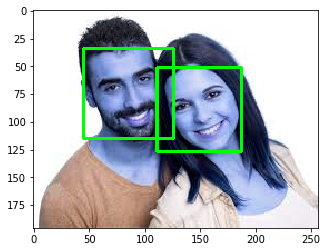

In [13]:
plt.imshow(image, cmap='gray')
plt.show()

## Wykrywanie poszczególnych elementów twarzy

wykorzystam tutaj inny obraz, na którym dokładniej widać elementy twarzy

In [14]:
imagePath = 'face.jpg'

In [15]:
eyeCascPath = 'eyecascade.xml'
mouthCascPath = 'Mouth.xml'
noseCascPath = 'nose.xml'

Tworzę kaskady Haara dla oczu, ust i nosa (a w zasadzie nosów bo zakładam że może być ich więcej)

In [16]:
eyeCascade = cv2.CascadeClassifier(eyeCascPath)
mouthCascade = cv2.CascadeClassifier(mouthCascPath)
noseCascade = cv2.CascadeClassifier(noseCascPath)

### Wczytujemy nowy obraz

In [17]:
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [18]:
faces = ""
eyes = ""
noses = ""
noses = ""

### Wykrywamy twarze oraz ich elementy
Parametr scale factor został dobrany przeze mnie drogą empiryczną.

In [19]:
faces = faceCascade.detectMultiScale( 
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = 0
)
eyes = eyeCascade.detectMultiScale(
    gray,
    scaleFactor=1.9
)
noses = noseCascade.detectMultiScale(
    gray,
    scaleFactor=2.5
)
mouths = mouthCascade.detectMultiScale(
    gray,
    scaleFactor=5.5
)

### Przedstawiamy uzyskane wyniki w postaci tekstowej

In [20]:
print("Found {0} faces!".format(len(faces)))
print("Found {0} eyes!".format(len(eyes)))
print("Found {0} noses!".format(len(noses)))
print("Found {0} mouths!".format(len(mouths)))
for (x, y, w, h) in faces:
    cv2.rectangle(image,(x, y), (x+w, y+h), (0, 255, 0), 2)
for (x, y, w, h) in eyes:
    cv2.rectangle(image,(x, y), (x+w, y+h), (255, 0, 0), 2)
for (x, y, w, h) in noses:
    cv2.rectangle(image,(x, y), (x+w, y+h), (255, 0, 255), 2)
for (x, y, w, h) in mouths:
    cv2.rectangle(image,(x, y), (x+w, y+h), (255, 255, 0), 2)

Found 1 faces!
Found 2 eyes!
Found 1 noses!
Found 1 mouths!


### Pokazujemy odnalezione części twarzy

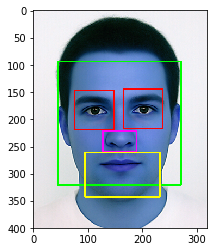

In [21]:
plt.imshow(image, cmap='gray')
plt.show()